In [1]:
#!pip install shap

In [1]:
import pandas as pd
#from datetime import timedelta
from pycaret.classification import *
import shap

In [11]:
df = pd.read_parquet('./data/final_clin_sofa_d1.parquet')

In [12]:
#df_w_sepsis3 = df

In [13]:
df.count()

stay_id                        22440
subject_id                     22440
hadm_id                        22440
hospital_expire_flag           22440
pao2fio2ratio_novent_avg_d1     4977
pao2fio2ratio_vent_avg_d1       8784
rate_epinephrine_avg_d1         1272
rate_norepinephrine_avg_d1      5613
rate_dopamine_avg_d1             665
rate_dobutamine_avg_d1           451
platelet_min_d1                22100
creatinine_max_d1              22181
bilirubin_max_d1               11367
respiration_d1                 13126
coagulation_d1                 22317
liver_d1                       13240
cardiovascular_d1              22404
cns_d1                         22440
renal_d1                       22433
dtype: int64

In [14]:
df.drop(['stay_id', 'subject_id', 'hadm_id'], axis=1, inplace=True)

In [15]:
# exp1 = setup(df, target = 'hospital_expire_flag', numeric_features=numerical_variables, categorical_features=categorical_variables, numeric_imputation='median', fix_imbalance=True, session_id=42)
exp2 = setup(df, target = 'hospital_expire_flag', numeric_imputation='median', fix_imbalance=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,hospital_expire_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22440, 16)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8382,0.7643,0.2085,0.5468,0.3015,0.2303,0.2649,0.1260
gbc,Gradient Boosting Classifier,0.8360,0.7638,0.2005,0.5313,0.2905,0.2187,0.2524,0.7110
xgboost,Extreme Gradient Boosting,0.8332,0.7462,0.2184,0.5061,0.3043,0.2265,0.2527,0.7450
ada,Ada Boost Classifier,0.8326,0.7496,0.2753,0.4992,0.3546,0.2678,0.2835,0.2150
dummy,Dummy Classifier,0.8324,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
rf,Random Forest Classifier,0.8270,0.7338,0.1838,0.4611,0.2624,0.1845,0.2099,0.3520
et,Extra Trees Classifier,0.8137,0.7126,0.2245,0.4028,0.2877,0.1904,0.2015,0.3520
dt,Decision Tree Classifier,0.7551,0.5798,0.3168,0.2893,0.3022,0.1541,0.1544,0.0620
ridge,Ridge Classifier,0.6946,0.0000,0.6715,0.3102,0.4243,0.2530,0.2880,0.0390
lda,Linear Discriminant Analysis,0.6945,0.7433,0.6715,0.3101,0.4243,0.2530,0.2880,0.0580


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
# Rank: 1st, AUC
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8383,0.7779,0.2091,0.5446,0.3022,0.2307,0.2648
1,0.8428,0.7774,0.2281,0.5769,0.3270,0.2564,0.2921
2,0.8269,0.7657,0.1711,0.4545,0.2486,0.1729,0.1995
3,0.8383,0.7720,0.2281,0.5405,0.3209,0.2459,0.2756
4,0.8504,0.7741,0.2424,0.6465,0.3526,0.2873,0.3318
5,0.8409,0.7532,0.2008,0.5761,0.2978,0.2310,0.2722
6,0.8377,0.7593,0.2083,0.5446,0.3014,0.2297,0.2639
7,0.8344,0.7763,0.1901,0.5155,0.2778,0.2061,0.2391
8,0.8395,0.7411,0.1825,0.5647,0.2759,0.2113,0.2545


In [10]:
#tuned_lgbm = tune_model(lgbm, optimize='AUC')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


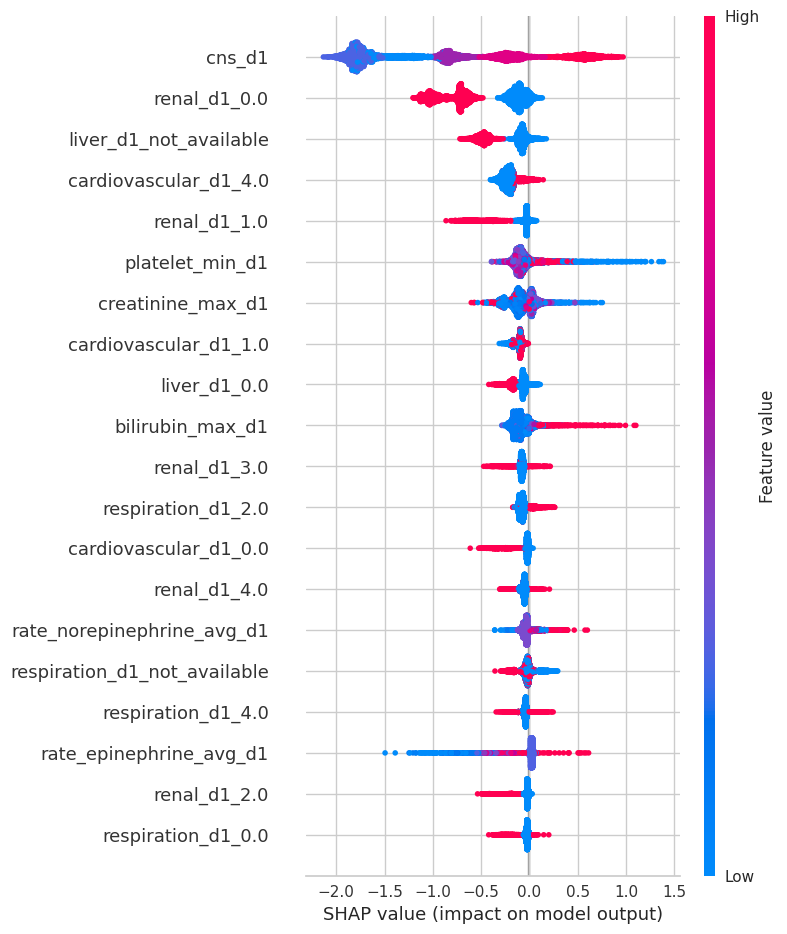

In [18]:
interpret_model(lgbm)

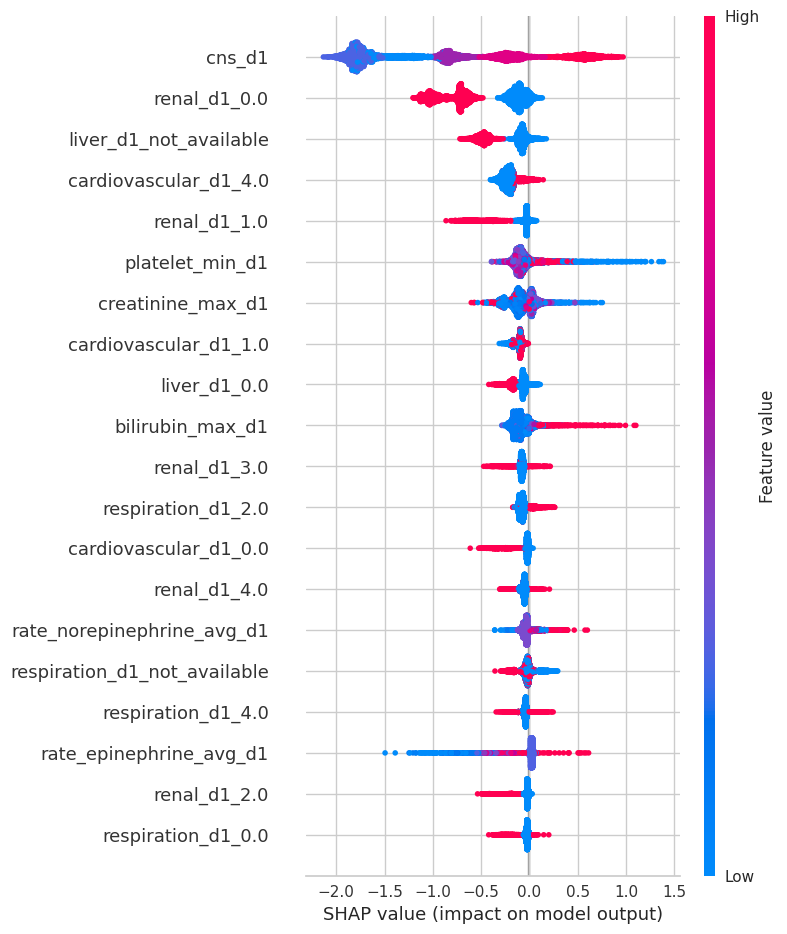

In [19]:
interpret_model(lgbm, plot='summary')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


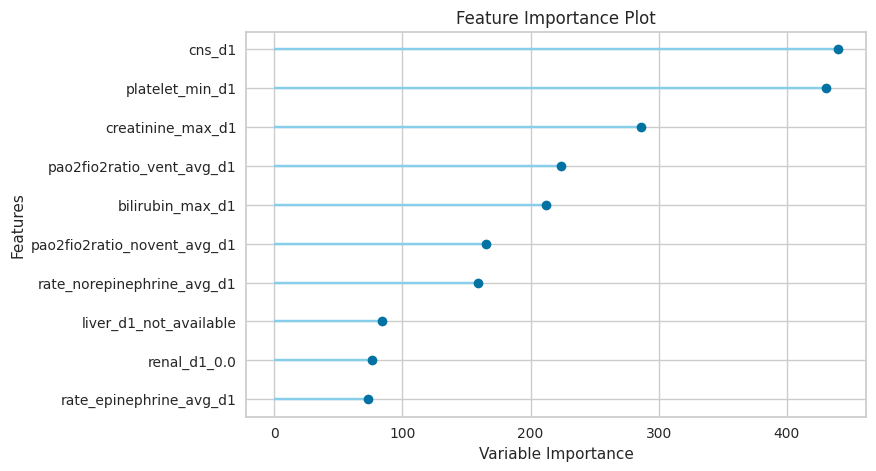

In [20]:
plot_model(lgbm, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


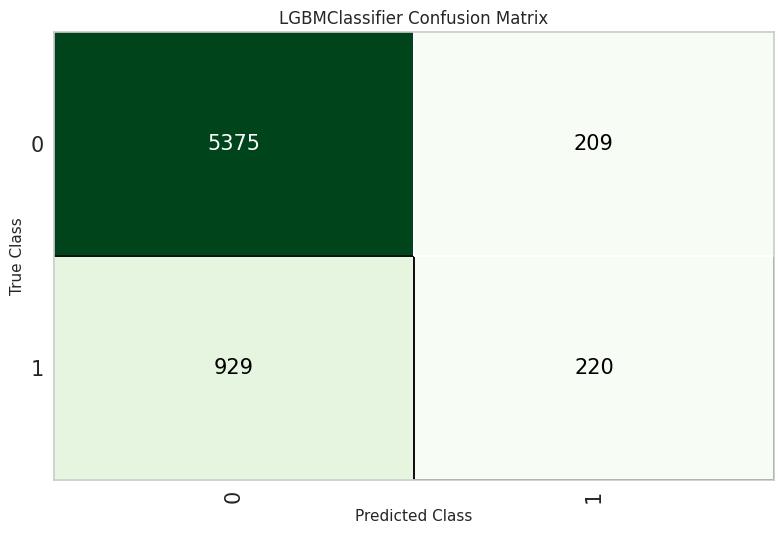

In [21]:
plot_model(lgbm, plot = 'confusion_matrix')

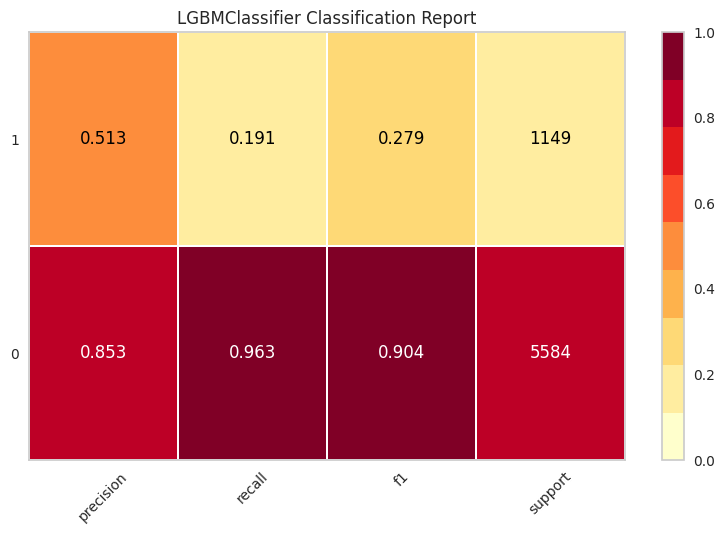

In [22]:
plot_model(lgbm, plot = 'class_report')

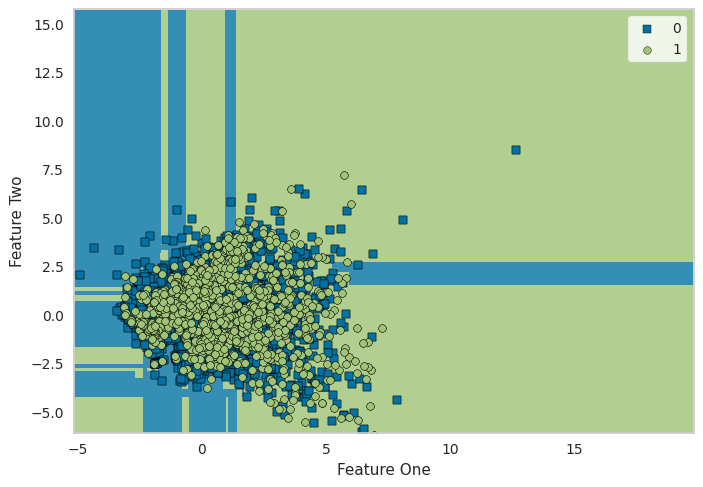

In [23]:
plot_model(lgbm, plot='boundary')

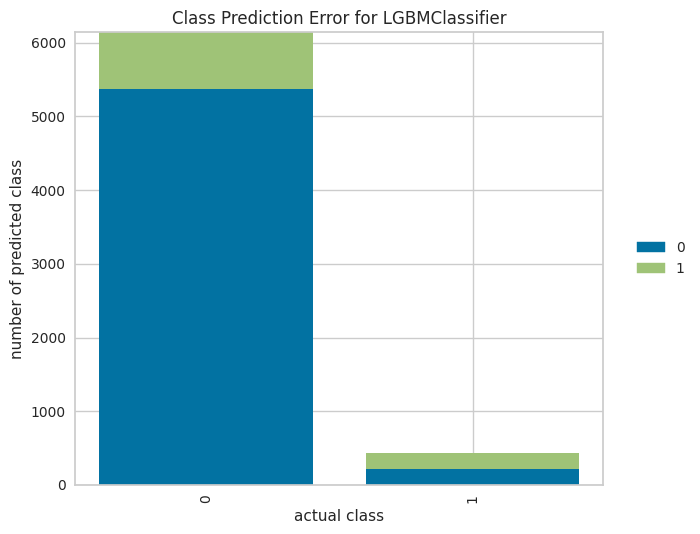

In [24]:
plot_model(lgbm, plot = 'error')

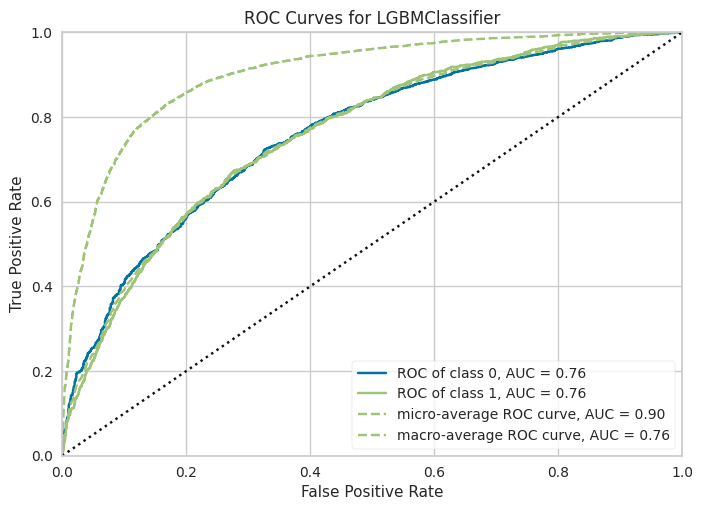

In [25]:
plot_model(lgbm, plot='auc')

In [26]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8310,0.7600,0.1915,0.5128,0.2788,0.2051,0.2373


,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,creatinine_max_d1,bilirubin_max_d1,cns_d1,...,cardiovascular_d1_not_available,renal_d1_0.0,renal_d1_1.0,renal_d1_2.0,renal_d1_3.0,renal_d1_4.0,renal_d1_not_available,hospital_expire_flag,Label,Score
0,138.333328,253.746796,0.030032,0.200602,5.495194,4.378946,203.0,2.3,1.5,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.6954
1,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,210.0,0.8,0.6,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9337
2,225.000000,388.333344,0.030032,0.105583,5.495194,4.378946,215.0,1.0,0.8,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8353
3,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,385.0,0.6,0.8,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9384
4,225.000000,253.746796,0.030032,0.105583,3.346423,4.378946,140.0,2.2,0.3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,224.444443,190.097229,0.030032,0.105583,5.495194,4.378946,254.0,0.8,0.8,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8416
6729,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,178.0,1.1,0.8,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8970
6730,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,85.0,6.2,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8543
6731,326.000000,327.000000,0.030032,0.105583,5.495194,4.378946,148.0,0.9,0.8,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8091


In [28]:
final_lgbm = finalize_model(lgbm)

In [29]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
save_model(lgbm, "models/lgbm_w_only_sofa_d1_wo_cluster")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hospital_expire_flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/pycaret/internal/pipeline.py", line 118, in fit
    result = super().fit(X, y=y, **fit_kwargs)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/imblearn/pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "/root/anaconda3/envs/tf1/lib/python3.7/site-packages/

In [ ]:
# new_prediction = predict_model(Final Model, data=data_unseen)
# new_prediction.head()

In [ ]:
# saved_final_model = load_model('Final Model')

In [ ]:
import matplotlib.pyplot as plt
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
names = [x[0] for x in imp]
values = [x[1] for x in imp]
plt.barh(names[:5], values[:5])

In [ ]:
imp = sorted(list(zip(tuned_cat.feature_names_, et.feature_importances_)), key= lambda x:x[1], reverse=True)
print("\n".join([": ".join([x[0], str(round(x[1], 4))]) for x in imp]))

In [ ]:
file_path
with open(file_path, 'w') as f: